<font color='red'>**Untersuchung der Kennlinien der BPW34 Si-Solarzellen mit dem auf dem Raspberry Pi basierten digitalen Messwerterfassungssystem D** </font>

Für die Untersuchung der Kennlinien I(U) und P(U) der Si-BPW34-Fotodiode braucht man ein Elektrometer für die Messung der U_D und einen Messverstärker für die Messung des Stroms. Die Spannung an der Fotozelle U_D sowie die Stromstärke I_D (gemessen über einen kleinen Widerstand) werden an zwei Kanälen des ADS1115-Wandler verbunden mit dem Raspberry Pi gemessen. Über einen Schalter kann man die Leerlaufspannung U_OC und den Kurzschlussstrom I_SC messen. Der Wert der Leistung P_D wird als Produkt der Spannung U_D und des Stroms I_D über die PhyPiDAQ-Software in der .daq-Konfiguration des Versuchs als Formel eingegeben und in Echtzeit dargestellt.

<img src="Scaltung_BPW34.jpg" align="center" width="500">

Im Messfenster der PhyPiDAQ-Software wird der zeitliche Verlauf des Spannung U_D(t), des Stroms I_D(t) und der Leistung P_D(t) gezeigt. Gleichzeitig kann man den Zusammenhang der Leistung als Funktion der Spannung P_D(U_D) untersuchen.  Man kann den Maximum Power Point (MPP) als der Punkt, bei dem die Solarzelle ihre maximale Leistung abgibt. Man wiederholt die Messungen bei unterschiedlichen Bestrahlungsstärken und Wellenlängen.

<img src="plot1.png" align="center" width="700">

Die Messdaten werden durch die PhyPiDAQ-Konfiguration als .csv-Datei gespeichert und für weitere Untersuchungen verwendet (siehe unten). Aus den Messdaten (hier mit Pandas ausgelesen) kann man den Maximum Power Point (MPP) sowie den Füllfaktor als Quotient aus maximaler Leistung und Kurzschlussstrom mal Leerlaufspannung bestimmen.

In [2]:
%%capture 
%pip install matplotlib pandas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Import data from CSV
df = pd.read_csv("testfile_221106-1138.csv", skiprows=2, delimiter=";")
df

,U_D:(mV),I_D:(mikroA),P_D:(nW),t:s
0,330.9,0.18750,0.06204,0.00
1,330.9,0.17190,0.05687,0.05
2,331.0,0.12500,0.04138,0.10
3,331.0,0.10940,0.03621,0.15
4,331.0,0.12500,0.04138,0.20
...,...,...,...,...
474,327.8,0.07813,0.02561,23.70
475,328.0,0.06250,0.02050,23.75
476,328.0,0.09375,0.03075,23.80
477,327.9,0.07813,0.02562,23.85


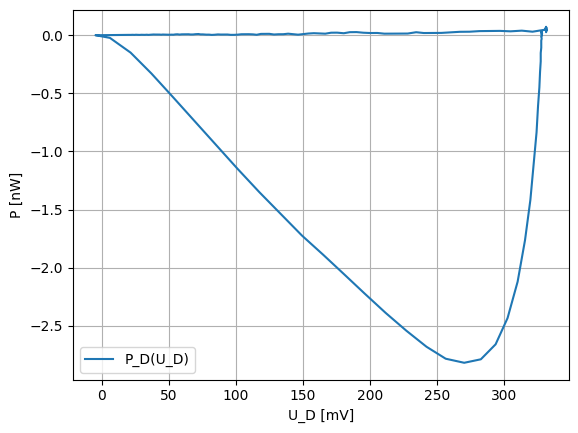

In [5]:
# Plot data
plt.plot(df[" U_D:(mV)"], df["P_D:(nW)"], label="P_D(U_D)")
plt.xlabel("U_D [mV]")
plt.ylabel("P [nW]")
plt.grid()
plt.legend()
plt.show()

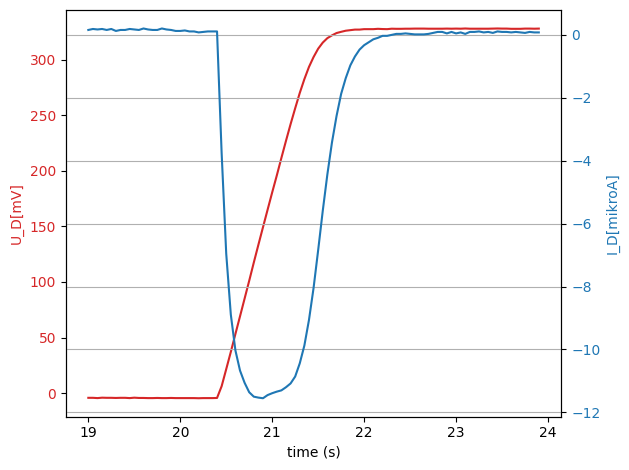

In [6]:
#zeitlicher Verlauf der Spannung U_D und des Stroms I_D
i_start = 380
i_end = 480
t = df["t:s"][i_start:i_end]
data1 = df[" U_D:(mV)"][i_start:i_end]
data2 = df["I_D:(mikroA)"][i_start:i_end]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('U_D[mV]', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('I_D[mikroA]', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()